In [11]:
from collections import Counter
from functools import partial
from matplotlib import pyplot as plt
from numpy.random import randint
from statistics import mean, stdev
from time import process_time

from tests import (
    generate_feasible_jobs_uniform_distribution,
    generate_feasible_mi_jobs,
)

# 2-approximation algorithms comparison

In [12]:
from models import AbstractJobPool
from schedulers import (
    FlowMethod,
    GreedyLowestDensityFirstScheduler,
    GreedyIntervalsScheduler,
    GreedyScheduler,
    LinearProgrammingMethod,
    LinearProgrammingRoundedScheduler,
)

In [61]:
approx_eff_testcases = {}
approx_eff_n = list(range(5, 51, 5))

is_feasible = partial(
    LinearProgrammingRoundedScheduler(LinearProgrammingMethod.HIGHS).process,
    max_concurrency=3,
)

for number_of_jobs in approx_eff_n:
    max_t = number_of_jobs * 4
    max_duration = max_t * 3 // number_of_jobs

    approx_eff_testcases[number_of_jobs] = [generate_feasible_jobs_uniform_distribution(
        number_of_jobs=number_of_jobs,
        max_t=max_t,
        length_range=(0, max_t),
        duration_range=(0, max_duration),
        is_feasible=is_feasible,
    ) for _ in range(5)]

In [62]:
edmonds_karp_t = []
shortest_augmenting_path_t = []
preflow_push_t = []
dinitz_t = []
boykov_kolmogorov_t = []
ford_fulkerson_t = []

edmonds_karp_scheduler = GreedyScheduler(FlowMethod.EDMONDS_KARP)
shortest_augmenting_path_scheduler = GreedyScheduler(FlowMethod.SHORTEST_AUGMENTING_PATH)
preflow_push_scheduler = GreedyScheduler(FlowMethod.PREFLOW_PUSH)
dinitz_scheduler = GreedyScheduler(FlowMethod.DINITZ)
boykov_kolmogorov_scheduler = GreedyScheduler(FlowMethod.BOYKOV_KOLMOGOROV)
ford_fulkerson_scheduler = GreedyScheduler(FlowMethod.FORD_FULKERSON)

for number_of_jobs, testcases in approx_eff_testcases.items():
    edmonds_karp_t.append(0)
    shortest_augmenting_path_t.append(0)
    preflow_push_t.append(0)
    dinitz_t.append(0)
    boykov_kolmogorov_t.append(0)
    ford_fulkerson_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        edmonds_karp_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        edmonds_karp_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        shortest_augmenting_path_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        shortest_augmenting_path_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        preflow_push_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        preflow_push_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        dinitz_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        dinitz_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        boykov_kolmogorov_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        boykov_kolmogorov_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        ford_fulkerson_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        ford_fulkerson_t[-1] += elapsed_time / len(testcases)

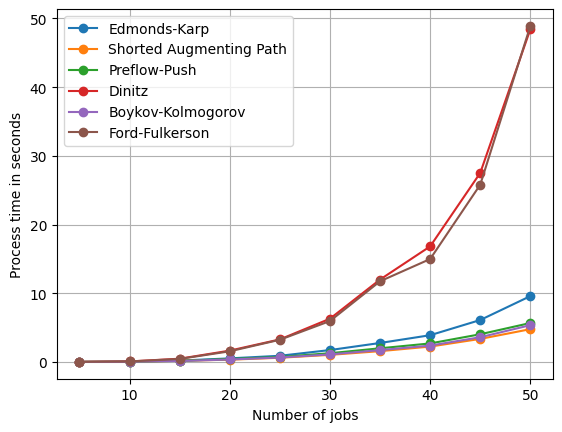

In [63]:
plt.plot(approx_eff_n, edmonds_karp_t, marker='o', label='Edmonds-Karp')
plt.plot(approx_eff_n, shortest_augmenting_path_t, marker='o', label='Shorted Augmenting Path')
plt.plot(approx_eff_n, preflow_push_t, marker='o', label='Preflow-Push')
plt.plot(approx_eff_n, dinitz_t, marker='o', label='Dinitz')
plt.plot(approx_eff_n, boykov_kolmogorov_t, marker='o', label='Boykov-Kolmogorov')
plt.plot(approx_eff_n, ford_fulkerson_t, marker='o', label='Ford-Fulkerson')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.savefig('./figures/greedy_flow_methods.png', bbox_inches='tight')

In [64]:
simplex_t = []
interior_point_t = []

simplex_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.REVISED_SIMPLEX)
interior_point_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.INTERIOR_POINT)

for number_of_jobs, testcases in approx_eff_testcases.items():
    simplex_t.append(0)
    interior_point_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        simplex_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        simplex_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        interior_point_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        interior_point_t[-1] += elapsed_time / len(testcases)

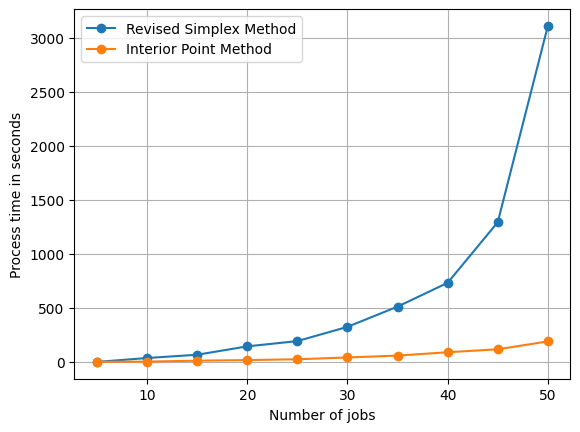

In [65]:
plt.plot(approx_eff_n, simplex_t, marker='o', label='Revised Simplex Method')
plt.plot(approx_eff_n, interior_point_t, marker='o', label='Interior Point Method')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.savefig('./figures/lp_rounded_lp_methods.png', bbox_inches='tight')

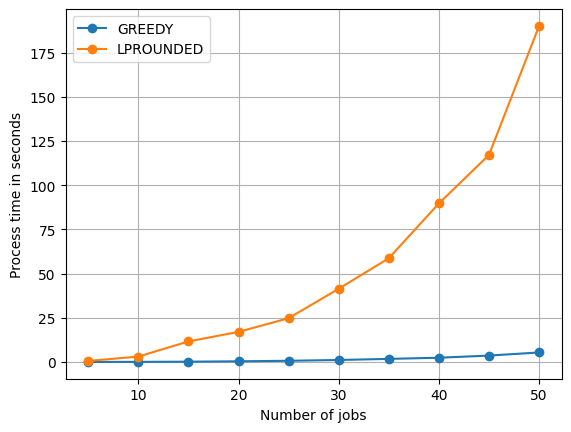

In [69]:
plt.plot(approx_eff_n, boykov_kolmogorov_t, marker='o', label='GREEDY')
plt.plot(approx_eff_n, interior_point_t, marker='o', label='LPROUNDED')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.savefig('./figures/greedy_vs_lp.png', bbox_inches='tight')

In [67]:
preflow_push_interval_t = []

preflow_push_interval_scheduler = GreedyIntervalsScheduler(FlowMethod.PREFLOW_PUSH)

for number_of_jobs, testcases in approx_eff_testcases.items():
    preflow_push_interval_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        preflow_push_interval_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        preflow_push_interval_t[-1] += elapsed_time / len(testcases)

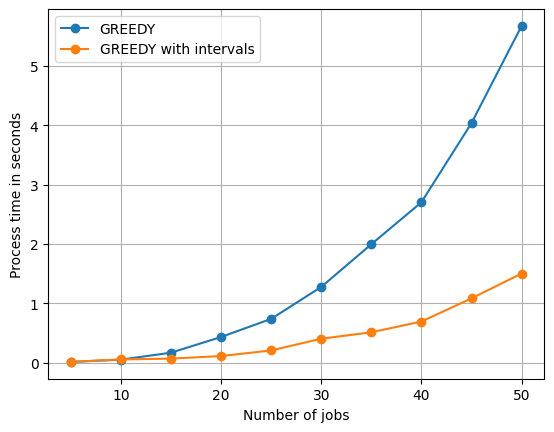

In [70]:
plt.plot(approx_eff_n, preflow_push_t, marker='o', label='GREEDY')
plt.plot(approx_eff_n, preflow_push_interval_t, marker='o', label='GREEDY with intervals')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.savefig('./figures/greedy_vs_greedy_intervals.png', bbox_inches='tight')

In [13]:
approx_accur_testcases = []

for _ in range(1000):
    number_of_jobs = randint(5, 50)
    max_t = randint(10, 200)
    max_concurrency = randint(1, 5)
    max_duration = max_t * max_concurrency // number_of_jobs
    
    is_feasible = partial(
        LinearProgrammingRoundedScheduler(LinearProgrammingMethod.HIGHS).process,
        max_concurrency=max_concurrency,
    )
    
    approx_accur_testcases.append((max_concurrency, generate_feasible_jobs_uniform_distribution(
        number_of_jobs=number_of_jobs,
        max_t=max_t,
        length_range=(0, max_t),
        duration_range=(0, max_duration),
        is_feasible=is_feasible,
    )))

In [14]:
greedy_ans = []
greedy_density_first_ans = []
simplex_ans = []
interior_point_ans = []

greedy_scheduler = GreedyScheduler(FlowMethod.PREFLOW_PUSH)
greedy_density_first_scheduler = GreedyLowestDensityFirstScheduler(FlowMethod.PREFLOW_PUSH)
simplex_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.HIGHS_DS)
interior_point_scheduler = LinearProgrammingRoundedScheduler(LinearProgrammingMethod.HIGHS_IPM)

for max_concurrency, testcase in approx_accur_testcases:
    schedule = greedy_scheduler.process(testcase, max_concurrency=max_concurrency)
    greedy_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))
    
    schedule = greedy_density_first_scheduler.process(testcase, max_concurrency=max_concurrency)
    greedy_density_first_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))
    
    schedule = simplex_scheduler.process(testcase, max_concurrency=max_concurrency)
    simplex_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))
    
    schedule = interior_point_scheduler.process(testcase, max_concurrency=max_concurrency)
    interior_point_ans.append(sum(ti.duration for ti in schedule.active_time_intervals))

In [15]:
print(mean(greedy_ans), stdev(greedy_ans))
print(mean(greedy_density_first_ans), stdev(greedy_density_first_ans))
print(mean(simplex_ans), stdev(simplex_ans))
print(mean(interior_point_ans), stdev(interior_point_ans))

46.882 28.36551918577692
46.4 28.041867739976706
46.732 28.117588352751287
47.646 28.183381397323263


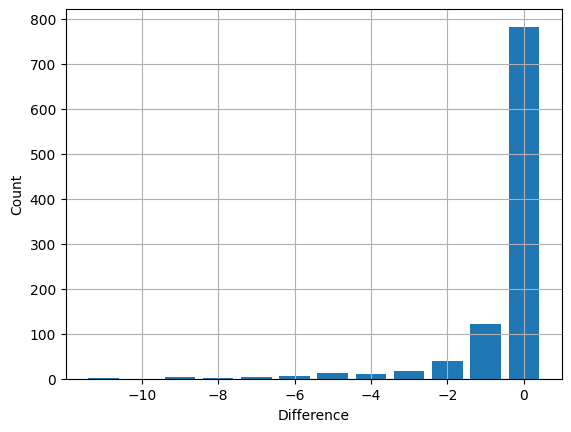

In [17]:
difference = Counter(
    greedy_density_first_ans[i] - greedy_ans[i] for i in range(len(approx_accur_testcases))
)

x = sorted(difference.keys())
y = [difference[key] for key in x]

plt.bar(x, y)

plt.xlabel('Difference')
plt.ylabel('Count')

plt.grid()
plt.savefig('./figures/lowest_density_first.png', bbox_inches='tight')

In [18]:
print(difference)

Counter({0: 782, -1: 121, -2: 40, -3: 18, -5: 12, -4: 10, -6: 6, -7: 4, -9: 4, -8: 2, -11: 1})


In [19]:
def get_average_density(job_pool: AbstractJobPool) -> float:
    counter = {}
    for job in job_pool.jobs:
        for t in range(job.release_time, job.deadline + 1):
            counter.setdefault(t, 0)
            counter[t] += 1
    
    return mean(counter.values())

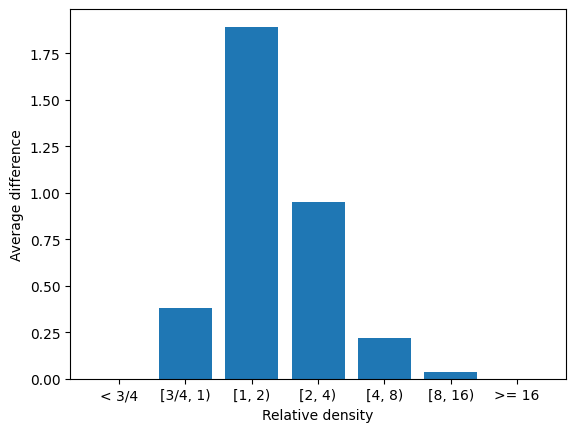

In [37]:
data = {}

for i in range(len(approx_accur_testcases)):
    max_concurrency, testcase = approx_accur_testcases[i]
    relative_density = get_average_density(testcase) / max_concurrency
    
    difference = greedy_ans[i] - greedy_density_first_ans[i]

    if relative_density < 3/4:
        data.setdefault('< 3/4', [])
        data['< 3/4'].append(difference)
    elif relative_density < 1:
        data.setdefault('[3/4, 1)', [])
        data['[3/4, 1)'].append(difference)
    elif relative_density < 2:
        data.setdefault('[1, 2)', [])
        data['[1, 2)'].append(difference)
    elif relative_density < 4:
        data.setdefault('[2, 4)', [])
        data['[2, 4)'].append(difference)
    elif relative_density < 8:
        data.setdefault('[4, 8)', [])
        data['[4, 8)'].append(difference)
    elif relative_density < 16:
        data.setdefault('[8, 16)', [])
        data['[8, 16)'].append(difference)
    else:
        data.setdefault('>= 16', [])
        data['>= 16'].append(difference)

x = ['< 3/4', '[3/4, 1)', '[1, 2)', '[2, 4)', '[4, 8)', '[8, 16)', '>= 16']
y = [mean(data[e]) for e in x]

plt.xlabel('Relative density')
plt.ylabel('Average difference')

plt.bar(x, y)

plt.savefig('./figures/relative_density.png', bbox_inches='tight')

# Unit jobs algorithms comparison

In [23]:
from schedulers import LazyActivationSchedulerT, LazyActivationSchedulerNLogN

In [192]:
lazyact_eff_testcases = {}
lazyact_eff_t = list(range(1000, 10001, 1000))

is_feasible = partial(LazyActivationSchedulerT().process, max_concurrency=3)

for max_t in lazyact_eff_t:
    lazyact_eff_testcases[max_t] = [generate_feasible_jobs_uniform_distribution(
        number_of_jobs=100,
        max_t=max_t,
        length_range=(1, max_t),
        duration_range=(1, 1),
        is_feasible=is_feasible,
    ) for _ in range(5)]

In [193]:
lazyact_non_linear_t = []
lazyact_linear_t = []

lazyact_non_linear_scheduler = LazyActivationSchedulerNLogN()
lazyact_linear_scheduler = LazyActivationSchedulerT()

for max_t, testcases in lazyact_eff_testcases.items():
    lazyact_non_linear_t.append(0)
    lazyact_linear_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        lazyact_non_linear_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        lazyact_non_linear_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        lazyact_linear_scheduler.process(testcase, max_concurrency=3)
        elapsed_time = process_time() - start_time
        lazyact_linear_t[-1] += elapsed_time / len(testcases)

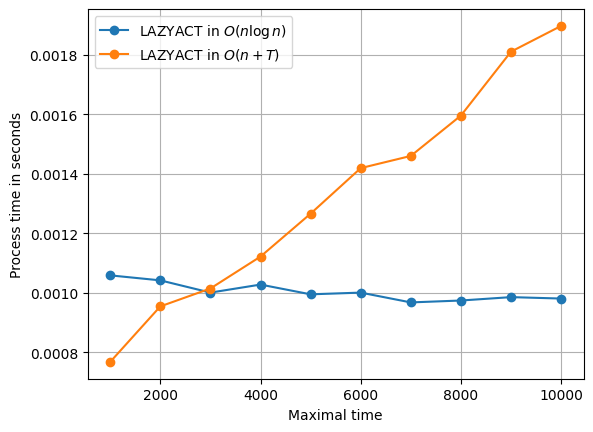

In [197]:
plt.plot(lazyact_eff_t, lazyact_non_linear_t, marker='o', label='LAZYACT in $O(n\log{n})$')
plt.plot(lazyact_eff_t, lazyact_linear_t, marker='o', label='LAZYACT in $O(n + T)$')

plt.legend()

plt.xlabel('Maximal time')
plt.ylabel('Process time in seconds')

plt.grid()
plt.savefig('./figures/lazyact.png', bbox_inches='tight')

# Comparison of algorithms for B = 2

In [19]:
from schedulers import MatchingScheduler, UpperDegreeConstrainedSubgraphScheduler

In [20]:
matching_eff_testcases = {}
matching_eff_n = list(range(5, 51, 5))

is_feasible = MatchingScheduler().process

for number_of_jobs in matching_eff_n:
    max_t = number_of_jobs * 4
    
    matching_eff_testcases[number_of_jobs] = [generate_feasible_mi_jobs(
        number_of_jobs=number_of_jobs,
        max_t=max_t,
        p_range=(0, 1),
        max_duration=1,
        is_feasible=is_feasible,
    ) for _ in range(5)]

In [21]:
matching_t = []
udcs_scheduler_t = []

matching_scheduler = MatchingScheduler()
udcs_scheduler = UpperDegreeConstrainedSubgraphScheduler()

for number_of_jobs, testcases in matching_eff_testcases.items():
    matching_t.append(0)
    udcs_scheduler_t.append(0)
    
    for testcase in testcases:
        start_time = process_time()
        matching_scheduler.process(testcase)
        elapsed_time = process_time() - start_time
        matching_t[-1] += elapsed_time / len(testcases)
        
        start_time = process_time()
        udcs_scheduler.process(testcase)
        elapsed_time = process_time() - start_time
        udcs_scheduler_t[-1] += elapsed_time / len(testcases)

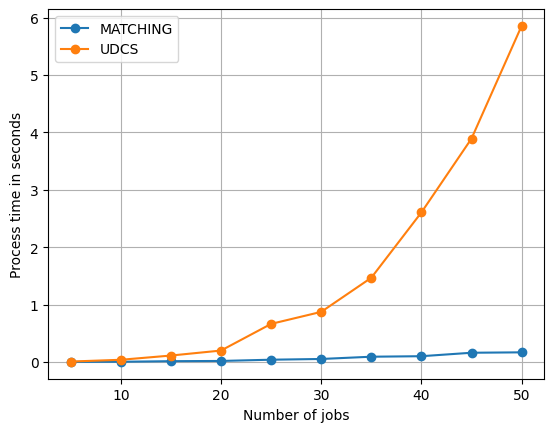

In [29]:
plt.plot(matching_eff_n, matching_t, marker='o', label='MATCHING')
plt.plot(matching_eff_n, udcs_scheduler_t, marker='o', label='UDCS')

plt.legend()

plt.xlabel('Number of jobs')
plt.ylabel('Process time in seconds')

plt.grid()
plt.savefig('./figures/matching.png', bbox_inches='tight')